In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df["customerID"].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# **1 . EDA**

**1.1 get numerical and categorical columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [7]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
num_but_cat

['SeniorCitizen']

In [9]:
cat_but_card = [col for col in cat_cols if df[col].nunique() > 20]
cat_but_card

['customerID', 'TotalCharges']

In [10]:
num_cols = [col for col in num_cols if col not in num_but_cat]
num_cols.append('TotalCharges')
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
cat_cols = [col for col in cat_cols if col not in cat_but_card]
cat_cols.extend(num_but_cat)
#cat_cols.remove('Churn') # target 
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

**1.2 correct types**

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#df.loc[488,'TotalCharges']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1.3 observe distributions**

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

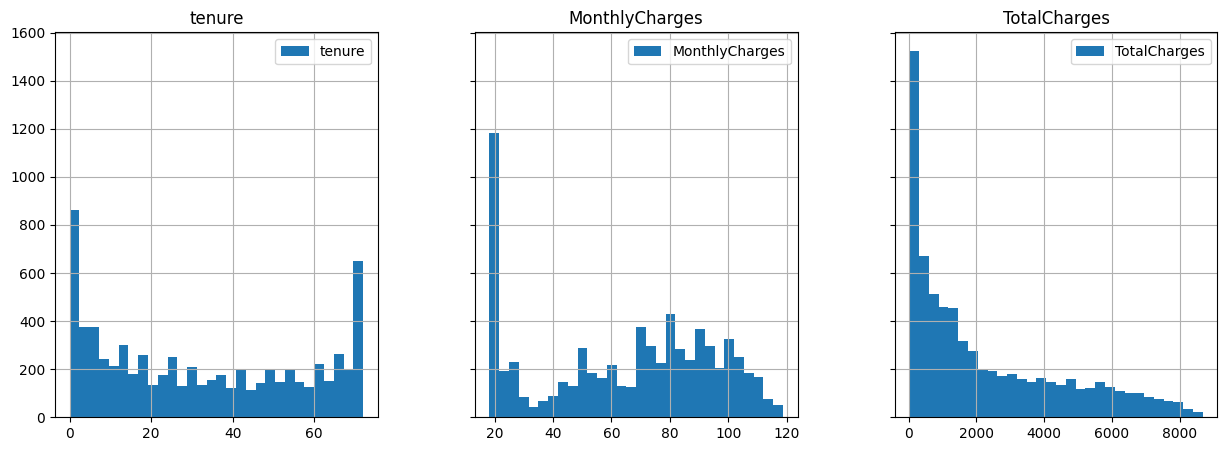

In [13]:
df[num_cols].hist(legend=True,layout=(1,len(num_cols)),figsize = (15,5),sharex=False,
    sharey=True,bins=30)

In [14]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


how to observe categorical columns?

**1.4 check categorical cols according to target col**

In [15]:
for col in cat_cols:
    print(df.groupby(col).agg({'Churn':'count'}))
    print("----")

        Churn
gender       
Female   3488
Male     3555
----
         Churn
Partner       
No        3641
Yes       3402
----
            Churn
Dependents       
No           4933
Yes          2110
----
              Churn
PhoneService       
No              682
Yes            6361
----
                  Churn
MultipleLines          
No                 3390
No phone service    682
Yes                2971
----
                 Churn
InternetService       
DSL               2421
Fiber optic       3096
No                1526
----
                     Churn
OnlineSecurity            
No                    3498
No internet service   1526
Yes                   2019
----
                     Churn
OnlineBackup              
No                    3088
No internet service   1526
Yes                   2429
----
                     Churn
DeviceProtection          
No                    3095
No internet service   1526
Yes                   2422
----
                     Churn
TechSupport         

**1.4 check outliers**

2 methods
1. IQR
1. LOF

In [16]:
def IQR(df,col,low = 0.25 , up  =0.75):
    q1 = df[col].quantile(low)
    q3 = df[col].quantile(up)
    IQR_RANGE = q3-q1
    low_limit = q1 - IQR_RANGE * 1.5
    up_limit = q3 + IQR_RANGE * 1.5
    #print(q1,q3,IQR_RANGE,low_limit,up_limit)
    return low_limit,up_limit

In [17]:
for col in num_cols:
    low , up = IQR(df,col)
    print(low,up,df[col].min(),df[col].max())
    print( df.loc[ (df[col] < low) | (df[col] > up)  ,col] )

-60.0 124.0 0 72
Series([], Name: tenure, dtype: int64)
-46.02499999999999 171.375 18.25 118.75
Series([], Name: MonthlyCharges, dtype: float64)
-4688.481250000001 8884.66875 18.8 8684.8
Series([], Name: TotalCharges, dtype: float64)


SORU : acaba veriler normal dağılmadığı için mi IQR limitleri garip geldi

LOF

In [18]:
#from sklearn.neighbors import LocalOutlierFactor
#clf = LocalOutlierFactor(n_neighbors=20)
#clf.fit_predict(df[num_cols])

#df_scores = clf.negative_outlier_factor_
#np.sort(df_scores)[0:5]

LOF ile de IQR ile de outlier analizi yapamadım , 

<Axes: >

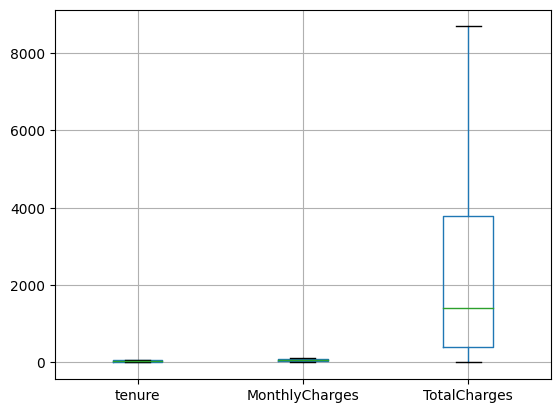

In [19]:
df[num_cols].boxplot()

görsel analize baktığımda , outlier yok gibi duruyor

**1.5 check missing values**

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# **2. Feature Engineering**

**2.1 handle outliers and missing values**

In [21]:
df.groupby("Churn").agg({"TotalCharges":"mean"})

,TotalCharges
Churn,
No,2555.344141
Yes,1531.796094


In [22]:
df.loc[df["TotalCharges"].isna() ,]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
df.loc[(df["TotalCharges"].isna()) & (df["Churn"] == "YES") ,"TotalCharges"]

Series([], Name: TotalCharges, dtype: float64)

In [24]:
df.loc[(df["TotalCharges"].isna()) & (df["Churn"] == "NO") ,"TotalCharges"]

Series([], Name: TotalCharges, dtype: float64)

NaN değerlerin hepsi churn etmeyenlere ait , tenure değerleri de 0 , bunlar yeni müşteriler

In [25]:
df.loc[df["tenure"]==0,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [26]:
df.drop(df.loc[df["tenure"]==0,:].index,inplace=True)
df.shape

(7032, 21)

In [27]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df[num_cols])

df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:5]

array([-8.59322075, -6.42861331, -5.98094887, -5.01065911, -5.00095931])

<Axes: title={'center': 'Elbow Method'}>

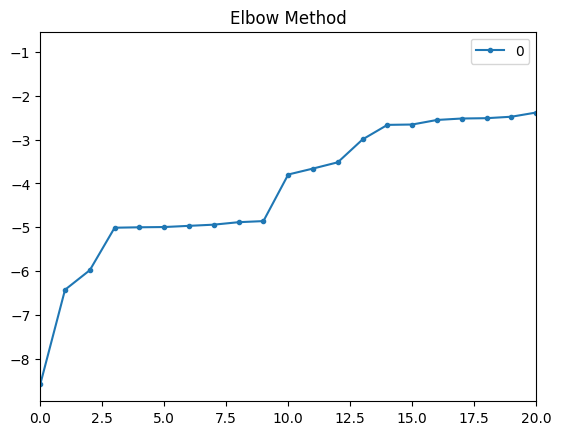

In [28]:
scores = pd.DataFrame(np.sort(
    df_scores))
scores.plot(stacked=True,xlim=[0,20],
            style='.-',title = 'Elbow Method')

In [29]:
th = np.sort(df_scores)[15]
df[df_scores < th]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
180,6317-YPKDH,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.95,29.95,Yes
252,9514-JDSKI,Male,1,Yes,No,1,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,40.20,40.20,Yes
900,1051-GEJLJ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.50,27.55,No
1282,6260-ONULR,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,62.80,62.80,No
3677,6656-JWRQX,Female,0,No,No,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,30.55,30.55,No
3753,1816-FLZDK,Male,0,No,No,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,29.15,29.15,No
3790,6598-RFFVI,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,28.30,Yes


In [30]:
df.drop(df[df_scores < th].index,inplace=True)

In [31]:
df.shape

(7017, 21)

**2.2 Create New Features**

**2.3 Encoding**

In [32]:
binary_cols = [col for col in cat_cols if df[col].dtype not in [int,float] and df[col].nunique()==2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [33]:
from sklearn.preprocessing import LabelEncoder
for col in binary_cols:
    labelEncoder = LabelEncoder()
    df[col] = (labelEncoder.fit_transform(df[col]))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1


In [34]:
non_binary_cols = [col for col in cat_cols if  10>=df[col].nunique()>2]
non_binary_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [35]:
for col in non_binary_cols:
    print( col , df[col].value_counts() )
    print("--")

MultipleLines MultipleLines
No                  3381
Yes                 2966
No phone service     670
Name: count, dtype: int64
--
InternetService InternetService
Fiber optic    3096
DSL            2403
No             1518
Name: count, dtype: int64
--
OnlineSecurity OnlineSecurity
No                     3487
Yes                    2012
No internet service    1518
Name: count, dtype: int64
--
OnlineBackup OnlineBackup
No                     3078
Yes                    2421
No internet service    1518
Name: count, dtype: int64
--
DeviceProtection DeviceProtection
No                     3084
Yes                    2415
No internet service    1518
Name: count, dtype: int64
--
TechSupport TechSupport
No                     3463
Yes                    2036
No internet service    1518
Name: count, dtype: int64
--
StreamingTV StreamingTV
No                     2800
Yes                    2699
No internet service    1518
Name: count, dtype: int64
--
StreamingMovies StreamingMovies
No          

In [36]:
df = pd.get_dummies(df,columns=non_binary_cols , drop_first=True,dtype=int)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,99.65,820.50,...,0,0,1,0,1,0,0,0,1,0


**2.4 Scaling**

In [37]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
for col in num_cols:
    df[col] = rs.fit_transform(df[[col]])
df[num_cols]    

,tenure,MonthlyCharges,TotalCharges
1,0.106383,-0.248384,0.143683
2,-0.574468,-0.305633,-0.380428
3,0.340426,-0.518929,0.129340
4,-0.574468,0.005540,-0.367630
5,-0.446809,0.540166,-0.170840
...,...,...,...
7038,-0.106383,0.265928,0.173399
7039,0.914894,0.605725,1.754075
7040,-0.382979,-0.753463,-0.310315
7041,-0.531915,0.073869,-0.322040


# **3.Modeling**

**3.1 Logistic Regression**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import (accuracy_score,roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             RocCurveDisplay)

X = df.drop(["Churn","customerID"],axis = 1)
y = df["Churn"]
# Model Validation : HOLDOUT
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=60)
log_model = LogisticRegression().fit(X_train,y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1544
           1       0.64      0.58      0.61       562

    accuracy                           0.80      2106
   macro avg       0.74      0.73      0.74      2106
weighted avg       0.79      0.80      0.80      2106

0.8364827457452105


In [39]:
# Model Validation: 5-Fold Cross Validation

log_model = LogisticRegression().fit(X,y)
cv_results = cross_validate(log_model,X,y,cv=5,scoring=[
    'accuracy','precision','recall','f1','roc_auc'])

print({k:cv_results[k].mean() for k in cv_results })
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

{'fit_time': 0.11619248390197753, 'score_time': 0.03453984260559082, 'test_accuracy': 0.8036186194418553, 'test_precision': 0.6541991902055075, 'test_recall': 0.5494623655913978, 'test_f1': 0.5972104001267879, 'test_roc_auc': 0.845457903535858}
0.8036186194418553
0.6541991902055075
0.5494623655913978
0.5972104001267879
0.845457903535858


**3.2 KNN**

In [40]:
knn_model = KNeighborsClassifier().fit(X,y)
y_pred = knn_model.predict(X)
y_prob = knn_model.predict_proba(X)[:,1]
print( classification_report(y,y_pred) )
print(roc_auc_score(y,y_prob))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5157
           1       0.72      0.64      0.68      1860

    accuracy                           0.84      7017
   macro avg       0.80      0.78      0.79      7017
weighted avg       0.84      0.84      0.84      7017

0.8997223733895467


In [41]:
# Model Validation : 5-Fold Cross Validation
cv_results = cross_validate(knn_model,X,y,cv=5,scoring=[
    'accuracy',"precision","recall",'f1','roc_auc'])

{k:cv_results[k].mean() for k in cv_results}
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

0.7716959791086662
0.5743801004539357
0.536021505376344
0.554472708613498
0.7827366966418294


**3.3 Hyperparameter Optimization**

In [42]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors":range(2,50),"weights":["uniform", "distance"] , 'leaf_size': (1,10,20,30,40), 'p': (1,2) }

from sklearn.model_selection import GridSearchCV

knn_gs_best = GridSearchCV(knn_model,knn_params,cv=5,n_jobs=-1,verbose=1).fit(X,y)
knn_gs_best.best_params_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


{'leaf_size': 1, 'n_neighbors': 42, 'p': 1, 'weights': 'uniform'}

In [44]:
knn_final = knn_model.set_params(
    **knn_gs_best.best_params_).fit(X,y)
cv_results = cross_validate(knn_final,X,y,cv=5,scoring=[
    "accuracy","precision","recall","f1","roc_auc"])

#{k:cv_results[k].mean() for k in cv_results}
print(cv_results['test_accuracy'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

0.8014800397195266
0.6417027971069142
0.5688172043010752
0.60302652431068
0.8343113118240764
